In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [3]:
# Veriyi CSV dosyasından yükleme
df = pd.read_csv('/content/earthquake.csv')

# Verinin ilk birkaç satırını görüntüleme
df.head()


,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [4]:
turkeydf=df[df["country"]=="turkey"]

In [5]:
turkeydf["city"].unique()

array(['bingol', 'kocaeli', 'manisa', 'sivas', 'sakarya', 'mugla', 'van',
       'balikesir', 'kirikkale', 'kahramanmaras', 'adiyaman', 'duzce',
       'antalya', 'kutahya', 'burdur', 'erzincan', 'hatay', 'mus',
       'denizli', 'canakkale', 'bolu', 'tokat', 'sanliurfa', 'corum',
       'izmir', 'gumushane', 'amasya', 'batman', 'cankiri', 'osmaniye',
       'elazig', 'bursa', 'erzurum', 'aydin', 'zonguldak', 'karabuk',
       'samsun', 'malatya', 'tekirdag', 'igdir', 'hakkari', 'ankara',
       'sirnak', 'diyarbakir', 'kirsehir', 'afyonkarahisar', 'kastamonu',
       'bartin', 'konya', 'isparta', 'kars', 'agri', 'bitlis', 'tunceli',
       'istanbul', 'yalova', 'yozgat', 'adana', 'usak', 'edirne',
       'kirklareli', 'mersin', 'bilecik', 'eskisehir', 'gaziantep',
       'bayburt', 'nigde', 'kayseri', 'giresun', 'mardin', 'artvin',
       'aksaray', 'ardahan', 'sinop', 'siirt', 'ordu', 'trabzon', 'kilis',
       'karaman', 'nevsehir', 'rize', 'marmara_denizi', nan, 'fethiye',
       '

In [6]:
turkeydf=turkeydf.dropna()

In [7]:
# Doğu Anadolu Bölgesi illerini tanımlama
dogu_anadolu_iller = ['malatya', 'elazig', 'bingol', 'tunceli', 'erzincan', 'erzurum', 'kars', 'agri', 'igdir', 'ardahan', 'van', 'mus', 'bitlis', 'hakkari']

# Doğu Anadolu Bölgesi illerine ait verileri filtreleme
dogu_df = turkeydf[turkeydf['city'].str.lower().isin(dogu_anadolu_iller)]

# Doğu Anadolu Bölgesi verilerinin ilk birkaç satırını görüntüleme
print(dogu_df.head())


              id        date         time    lat   long country city  \
20  1.970000e+13  1966.08.19  12:03:55 AM  39.21  41.40  turkey  mus   
27  1.970000e+13  1966.08.19  12:41:18 AM  39.13  41.48  turkey  mus   
65  1.970000e+13  1974.01.06  12:37:24 AM  38.28  42.92  turkey  van   
70  2.000000e+13  2003.10.20  12:27:00 AM  38.91  43.66  turkey  van   
94  2.020000e+13  2017.07.15  12:00:31 AM  38.17  43.23  turkey  van   

                 area   direction  dist  depth   xm   md  richter   mw   ms  \
20        tasci_varto        east   0.1   14.0  5.0  4.7      4.7  5.0  4.7   
27    yedikavak_varto  south_west   0.2   50.0  5.0  4.7      4.7  5.0  4.7   
65       kazanc_gevas  north_west   0.2   28.0  4.4  4.2      4.4  4.4  4.0   
70  ovapinar_muradiye  north_west   0.2    9.0  4.9  4.5      0.0  4.9  0.0   
94   boyunpinar_catak  north_east   0.2    2.1  3.5  0.0      3.3  3.5  0.0   

     mb  
20  4.7  
27  4.7  
65  4.3  
70  4.8  
94  0.0  


In [8]:
dogu_df["city"].unique()

array(['mus', 'van', 'bingol', 'elazig', 'bitlis', 'erzincan', 'hakkari',
       'erzurum', 'malatya', 'kars', 'tunceli', 'agri', 'ardahan',
       'igdir'], dtype=object)

In [11]:
turkeydf['date'] = pd.to_datetime(turkeydf['date'], format='%Y.%m.%d', errors='coerce')
filtdf = dogu_df[(turkeydf['date'].dt.year >= 2000) & (turkeydf['date'].dt.year <= 2020)]

<ipython-input-11-8c2b04620969>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtdf = dogu_df[(turkeydf['date'].dt.year >= 2000) & (turkeydf['date'].dt.year <= 2020)]


In [12]:
filtdf.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
70,2.000000e+13,2003.10.20,12:27:00 AM,38.91,43.66,turkey,van,ovapinar_muradiye,north_west,0.2,9.0,4.9,4.5,0.0,4.9,0.0,4.8
94,2.020000e+13,2017.07.15,12:00:31 AM,38.17,43.23,turkey,van,boyunpinar_catak,north_east,0.2,2.1,3.5,0.0,3.3,3.5,0.0,0.0
181,2.010000e+13,2013.09.26,12:55:36 AM,38.84,43.58,turkey,van,akcift,north,0.3,5.0,4.0,0.0,4.0,4.0,0.0,0.0
208,2.010000e+13,2007.08.25,12:05:47 AM,39.26,41.04,turkey,bingol,serpmekaya_karliova,south_west,0.4,5.0,5.4,0.0,5.4,5.1,0.0,0.0
213,2.020000e+13,2015.04.28,12:01:02 AM,38.90,43.58,turkey,van,cakirbey,south_west,0.4,2.1,4.0,0.0,4.0,3.8,0.0,0.0


In [13]:
dogu_df.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
20,1.970000e+13,1966.08.19,12:03:55 AM,39.21,41.40,turkey,mus,tasci_varto,east,0.1,14.0,5.0,4.7,4.7,5.0,4.7,4.7
27,1.970000e+13,1966.08.19,12:41:18 AM,39.13,41.48,turkey,mus,yedikavak_varto,south_west,0.2,50.0,5.0,4.7,4.7,5.0,4.7,4.7
65,1.970000e+13,1974.01.06,12:37:24 AM,38.28,42.92,turkey,van,kazanc_gevas,north_west,0.2,28.0,4.4,4.2,4.4,4.4,4.0,4.3
70,2.000000e+13,2003.10.20,12:27:00 AM,38.91,43.66,turkey,van,ovapinar_muradiye,north_west,0.2,9.0,4.9,4.5,0.0,4.9,0.0,4.8
94,2.020000e+13,2017.07.15,12:00:31 AM,38.17,43.23,turkey,van,boyunpinar_catak,north_east,0.2,2.1,3.5,0.0,3.3,3.5,0.0,0.0


In [14]:
dogu_df.isnull().sum()

id           0
date         0
time         0
lat          0
long         0
country      0
city         0
area         0
direction    0
dist         0
depth        0
xm           0
md           0
richter      0
mw           0
ms           0
mb           0
dtype: int64

In [15]:
filtdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 70 to 10057
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         142 non-null    float64
 1   date       142 non-null    object 
 2   time       142 non-null    object 
 3   lat        142 non-null    float64
 4   long       142 non-null    float64
 5   country    142 non-null    object 
 6   city       142 non-null    object 
 7   area       142 non-null    object 
 8   direction  142 non-null    object 
 9   dist       142 non-null    float64
 10  depth      142 non-null    float64
 11  xm         142 non-null    float64
 12  md         142 non-null    float64
 13  richter    142 non-null    float64
 14  mw         142 non-null    float64
 15  ms         142 non-null    float64
 16  mb         142 non-null    float64
dtypes: float64(11), object(6)
memory usage: 24.0+ KB


In [16]:
import plotly.express as px
df=filtdf.copy()
# Define the bins for the earthquake magnitudes
bins = [0, 4.5, 5.5, 6.5, 7.5, 10]

# Create a new column 'Magnitude Group' based on the bins
df['Magnitude Group'] = pd.cut(df['md'], bins, labels=['<4.5', '4.5-5.5', '5.5-6.5', '6.5-7.5', '7.5+'])

# Calculate the percentage of earthquakes in each magnitude group
counts = df.groupby('Magnitude Group').size()
percentages = counts / counts.sum() * 100

# Create a pie chart
fig = px.pie(values=percentages, names=percentages.index, title='Percentage of Earthquakes by Magnitude Group in Turkey')

# Set font size and color
fig.update_layout(
    font=dict(size=16, color='black'),
    title=dict(font=dict(size=20, color='black'))
)# Add labels to the pie chart
fig.update_traces(textinfo='percent+label')

# Show the plot
fig.show()

In [17]:
df.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,Magnitude Group
70,2.000000e+13,2003.10.20,12:27:00 AM,38.91,43.66,turkey,van,ovapinar_muradiye,north_west,0.2,9.0,4.9,4.5,0.0,4.9,0.0,4.8,<4.5
94,2.020000e+13,2017.07.15,12:00:31 AM,38.17,43.23,turkey,van,boyunpinar_catak,north_east,0.2,2.1,3.5,0.0,3.3,3.5,0.0,0.0,NaN
181,2.010000e+13,2013.09.26,12:55:36 AM,38.84,43.58,turkey,van,akcift,north,0.3,5.0,4.0,0.0,4.0,4.0,0.0,0.0,NaN
208,2.010000e+13,2007.08.25,12:05:47 AM,39.26,41.04,turkey,bingol,serpmekaya_karliova,south_west,0.4,5.0,5.4,0.0,5.4,5.1,0.0,0.0,NaN
213,2.020000e+13,2015.04.28,12:01:02 AM,38.90,43.58,turkey,van,cakirbey,south_west,0.4,2.1,4.0,0.0,4.0,3.8,0.0,0.0,NaN


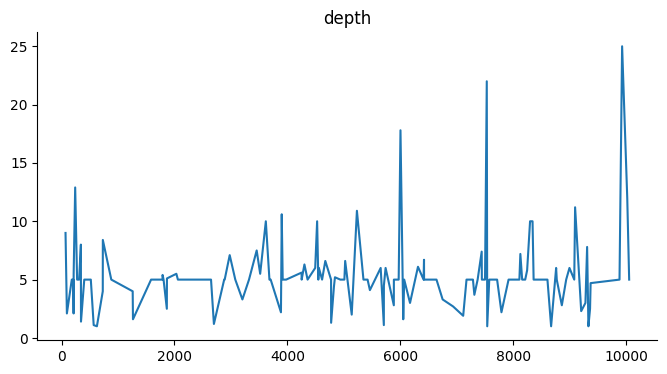

In [21]:
from matplotlib import pyplot as plt
filtdf['depth'].plot(kind='line', figsize=(8, 4), title='depth')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-22-86b38e03f61d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




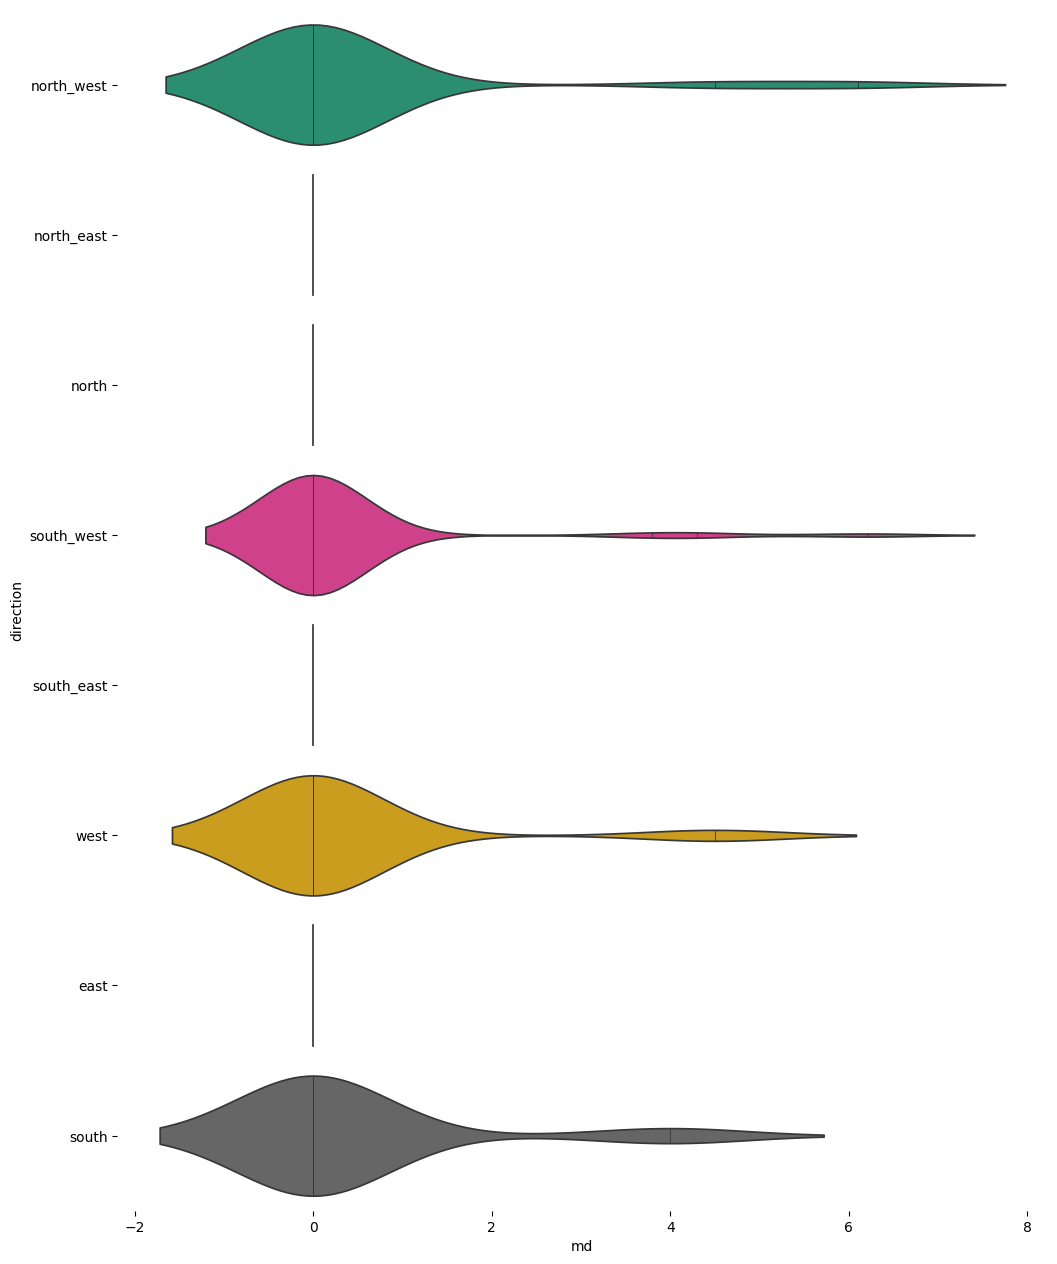

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(filtdf['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(filtdf, x='md', y='direction', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

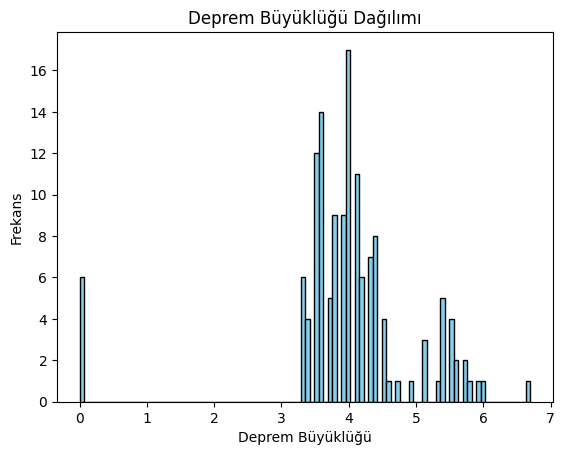

In [25]:
import matplotlib.pyplot as plt

# Deprem büyüklüğünü histogram olarak görselleştirme
plt.hist(filtdf['richter'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Deprem Büyüklüğü')
plt.ylabel('Frekans')
plt.title('Deprem Büyüklüğü Dağılımı')
plt.show()


<ipython-input-27-5cb5ff2a1554>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



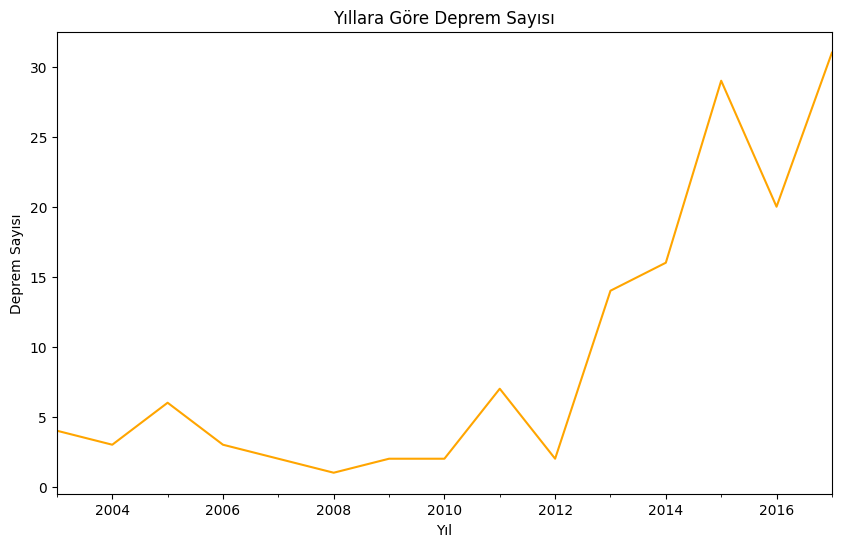

In [27]:
# Tarih sütununu datetime olarak dönüştürme
filtdf['date'] = pd.to_datetime(filtdf['date'])

# Yıllara göre deprem sayısını zaman serisi grafiği olarak görselleştirme
plt.figure(figsize=(10, 6))
filtdf.set_index('date').resample('Y').size().plot(color='orange')
plt.title('Yıllara Göre Deprem Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Deprem Sayısı')
plt.show()


In [28]:
import folium

# Türkiye'nin merkezi
turkey_center =[39.9208, 41.2741]

# Boş bir harita oluşturma
m = folium.Map(location=turkey_center, zoom_start=6)

# Depremleri haritaya işaretleyerek görselleştirme
for i, row in filtdf.iterrows():
    folium.CircleMarker(location=[row['lat'], row['long']], radius=3, color='red', fill=True, fill_color='red').add_to(m)

# Haritayı gösterme
m


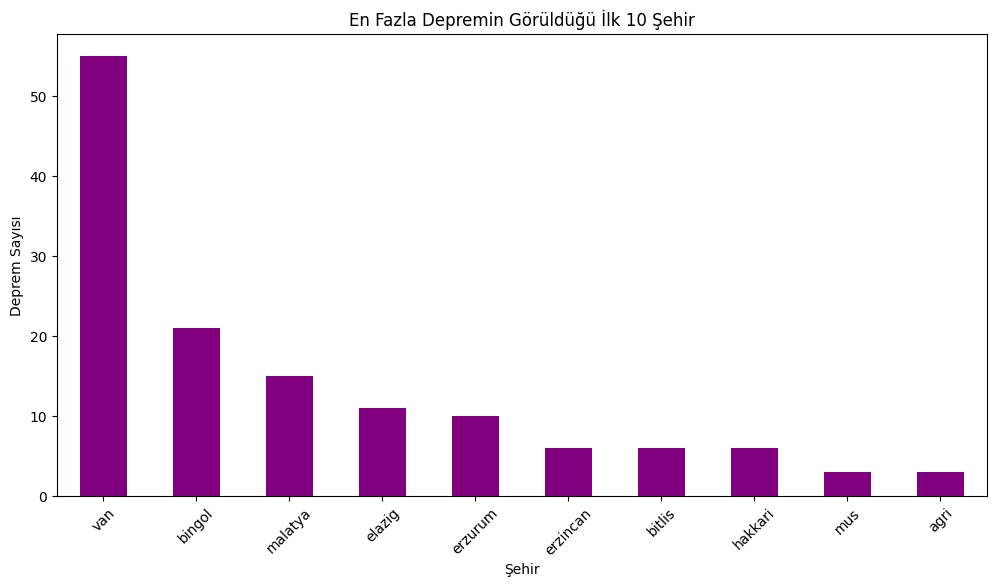

In [29]:
# Şehirlere göre deprem sayısını bar grafiği olarak görselleştirme
plt.figure(figsize=(12, 6))
filtdf['city'].value_counts().nlargest(10).plot(kind='bar', color='purple')
plt.xlabel('Şehir')
plt.ylabel('Deprem Sayısı')
plt.title('En Fazla Depremin Görüldüğü İlk 10 Şehir')
plt.xticks(rotation=45)
plt.show()
